In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import Imputing_Missing_Data
import matplotlib.pyplot as plt
% matplotlib inline

from matplotlib.ticker import PercentFormatter

importing Jupyter notebook from Imputing_Missing_Data.ipynb


In [2]:
datafile = 'C:/Projects/DataScienceProject/application_train.csv'
data1 = pd.read_csv(datafile)
df = pd.DataFrame(data1)
data = df.copy()

In [3]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print('The Dimension of the dataset is:\n')
print('There are ' + str(data.shape[0]) + ' observations and ' + str(data.shape[1]) + ' variables in the dataset.')

The Dimension of the dataset is:

There are 307511 observations and 122 variables in the dataset.


In [5]:
DataTypes = data.dtypes.value_counts()
print('The data types information of the dataset are:')
DataTypes

The data types information of the dataset are:


float64    65
int64      41
object     16
dtype: int64

In [6]:
ObjectType = data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
print('The categorical variables and distinctive values are:')
ObjectType

The categorical variables and distinctive values are:


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [7]:
IntType = data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)
print('The int variables and distinctive values are:')
IntType

The int variables and distinctive values are:


SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMEN

In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
Columns = data.columns
print('The columns of dataset are:')
pd.Series(Columns)

The columns of dataset are:


0                      SK_ID_CURR
1                          TARGET
2              NAME_CONTRACT_TYPE
3                     CODE_GENDER
4                    FLAG_OWN_CAR
5                 FLAG_OWN_REALTY
6                    CNT_CHILDREN
7                AMT_INCOME_TOTAL
8                      AMT_CREDIT
9                     AMT_ANNUITY
10                AMT_GOODS_PRICE
11                NAME_TYPE_SUITE
12               NAME_INCOME_TYPE
13            NAME_EDUCATION_TYPE
14             NAME_FAMILY_STATUS
15              NAME_HOUSING_TYPE
16     REGION_POPULATION_RELATIVE
17                     DAYS_BIRTH
18                  DAYS_EMPLOYED
19              DAYS_REGISTRATION
20                DAYS_ID_PUBLISH
21                    OWN_CAR_AGE
22                     FLAG_MOBIL
23                 FLAG_EMP_PHONE
24                FLAG_WORK_PHONE
25               FLAG_CONT_MOBILE
26                     FLAG_PHONE
27                     FLAG_EMAIL
28                OCCUPATION_TYPE
29            

In [10]:
Missing_Table = Imputing_Missing_Data.miss_values_table(data)
Missing_Table.head(20)

Your selected dataframe has 122columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [11]:
Features = data.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
Labels = data['TARGET']

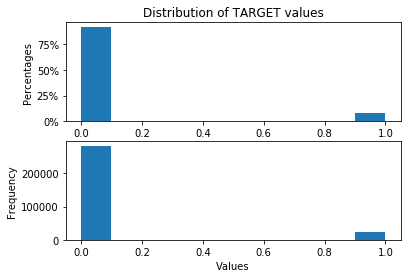

In [12]:
plt.subplot(2, 1, 1)
plt.hist(Labels, weights=np.ones(len(Labels)) / len(Labels))
plt.title('Distribution of TARGET values')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('Percentages')

plt.subplot(2, 1, 2)
plt.hist(Labels)
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.show()

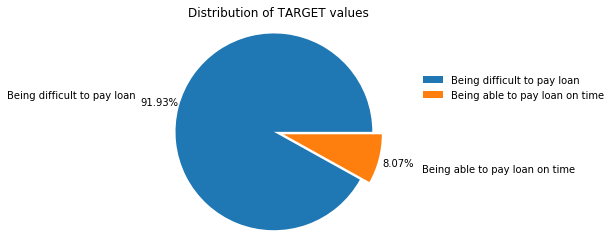

In [13]:
fig, ax = plt.subplots()
labels = ['Being difficult to pay loan', 'Being able to pay loan on time']
PercentOfNotAble = 100 * (Labels.value_counts()[0]/len(Labels))
PercentOfAble = 100 * (Labels.value_counts()[1]/len(Labels))
percentages = [PercentOfNotAble, PercentOfAble]
explode=(0.1,0)
ax.pie(percentages, explode, labels, autopct='%0.2f%%', pctdistance=1.2, labeldistance=1.45)
ax.axis('equal')
ax.set_title("Distribution of TARGET values")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))